# ABBA-BABA Task
In this notebook I perform the ABBA-BABA Test with 

 <b>((([ <i>An.gambiae <sub>pops</sub></i> ], [ <i>An.coluzzii <sub>pops</sub></i> ]), Kenya), [ <i>An.melas</i> ])</b>
 
 There are 40 comparisons. On the first plot i take mean, max-min, 5-95 percentile for each block in all comparisons along chromosomal arms 3R and 3L.
 On the other plots were reported the single test along the chromosomal arms 3R and 3L.

Loading python modules:

In [1]:
import allel
import zarr
import pandas as pd
import petl as etl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette()

Loading phase2 allele counts, callset and outgroups allele counts:

In [2]:
calldata_out= zarr.open('D:/Genomes/extras/outgroup_alleles_phase2.zarr')
calldata_out.tree()

/
 ├── 2L
 │   ├── arab (8906423, 2) int32
 │   ├── chri (8906423, 2) int32
 │   ├── epir (8906423, 2) int32
 │   ├── mela (8906423, 2) int32
 │   ├── meru (8906423, 2) int32
 │   └── quad (8906423, 2) int32
 ├── 2R
 │   ├── arab (12047846, 2) int32
 │   ├── chri (12047846, 2) int32
 │   ├── epir (12047846, 2) int32
 │   ├── mela (12047846, 2) int32
 │   ├── meru (12047846, 2) int32
 │   └── quad (12047846, 2) int32
 ├── 3L
 │   ├── arab (7897666, 2) int32
 │   ├── chri (7897666, 2) int32
 │   ├── epir (7897666, 2) int32
 │   ├── mela (7897666, 2) int32
 │   ├── meru (7897666, 2) int32
 │   └── quad (7897666, 2) int32
 ├── 3R
 │   ├── arab (10752701, 2) int32
 │   ├── chri (10752701, 2) int32
 │   ├── epir (10752701, 2) int32
 │   ├── mela (10752701, 2) int32
 │   ├── meru (10752701, 2) int32
 │   └── quad (10752701, 2) int32
 └── X
     ├── arab (4472265, 2) int32
     ├── chri (4472265, 2) int32
     ├── epir (4472265, 2) int32
     ├── mela (4472265, 2) int32
     ├── meru (4472265, 2) int32
     └── quad (4472265, 2) int32

In [3]:
calldata_biallel= zarr.open('D:/Genomes/extras/phase2_biallel_allele_count.zarr')
calldata_biallel.tree()

/
 ├── 2L
 │   ├── AOcol (8906423, 2) int32
 │   ├── BFcol (8906423, 2) int32
 │   ├── BFgam (8906423, 2) int32
 │   ├── CIcol (8906423, 2) int32
 │   ├── CMgam (8906423, 2) int32
 │   ├── FRgam (8906423, 2) int32
 │   ├── GAgam (8906423, 2) int32
 │   ├── GHcol (8906423, 2) int32
 │   ├── GHgam (8906423, 2) int32
 │   ├── GM (8906423, 2) int32
 │   ├── GNcol (8906423, 2) int32
 │   ├── GNgam (8906423, 2) int32
 │   ├── GQgam (8906423, 2) int32
 │   ├── GW (8906423, 2) int32
 │   ├── KE (8906423, 2) int32
 │   └── UGgam (8906423, 2) int32
 ├── 2R
 │   ├── AOcol (12047846, 2) int32
 │   ├── BFcol (12047846, 2) int32
 │   ├── BFgam (12047846, 2) int32
 │   ├── CIcol (12047846, 2) int32
 │   ├── CMgam (12047846, 2) int32
 │   ├── FRgam (12047846, 2) int32
 │   ├── GAgam (12047846, 2) int32
 │   ├── GHcol (12047846, 2) int32
 │   ├── GHgam (12047846, 2) int32
 │   ├── GM (12047846, 2) int32
 │   ├── GNcol (12047846, 2) int32
 │   ├── GNgam (12047846, 2) int32
 │   ├── GQgam (12047846, 2) int32
 │   ├── GW (12047846, 2) int32
 │   ├── KE (12047846, 2) int32
 │   └── UGgam (12047846, 2) int32
 ├── 3L
 │   ├── AOcol (7897666, 2) int32
 │   ├── BFcol (7897666, 2) int32
 │   ├── BFgam (7897666, 2) int32
 │   ├── CIcol (7897666, 2) int32
 │   ├── CMgam (7897666, 2) int32
 │   ├── FRgam (7897666, 2) int32
 │   ├── GAgam (7897666, 2) int32
 │   ├── GHcol (7897666, 2) int32
 │   ├── GHgam (7897666, 2) int32
 │   ├── GM (7897666, 2) int32
 │   ├── GNcol (7897666, 2) int32
 │   ├── GNgam (7897666, 2) int32
 │   ├── GQgam (7897666, 2) int32
 │   ├── GW (7897666, 2) int32
 │   ├── KE (7897666, 2) int32
 │   └── UGgam (7897666, 2) int32
 ├── 3R
 │   ├── AOcol (10752701, 2) int32
 │   ├── BFcol (10752701, 2) int32
 │   ├── BFgam (10752701, 2) int32
 │   ├── CIcol (10752701, 2) int32
 │   ├── CMgam (10752701, 2) int32
 │   ├── FRgam (10752701, 2) int32
 │   ├── GAgam (10752701, 2) int32
 │   ├── GHcol (10752701, 2) int32
 │   ├── GHgam (10752701, 2) int32
 │   ├── GM (10752701, 2) int32
 │   ├── GNcol (10752701, 2) int32
 │   ├── GNgam (10752701, 2) int32
 │   ├── GQgam (10752701, 2) int32
 │   ├── GW (10752701, 2) int32
 │   ├── KE (10752701, 2) int32
 │   └── UGgam (10752701, 2) int32
 └── X
     ├── AOcol (4472265, 2) int32
     ├── BFcol (4472265, 2) int32
     ├── BFgam (4472265, 2) int32
     ├── CIcol (4472265, 2) int32
     ├── CMgam (4472265, 2) int32
     ├── FRgam (4472265, 2) int32
     ├── GAgam (4472265, 2) int32
     ├── GHcol (4472265, 2) int32
     ├── GHgam (4472265, 2) int32
     ├── GM (4472265, 2) int32
     ├── GNcol (4472265, 2) int32
     ├── GNgam (4472265, 2) int32
     ├── GQgam (4472265, 2) int32
     ├── GW (4472265, 2) int32
     ├── KE (4472265, 2) int32
     └── UGgam (4472265, 2) int32

In [4]:
callset_biallel = zarr.open('D:/Genomes/variation/ag1000g.phase2.ar1.pass.biallelic')
callset_biallel.tree()

/
 ├── 2L
 │   ├── samples (1142,) object
 │   └── variants
 │       ├── ABHet (8906423,) float32
 │       ├── ABHom (8906423,) float32
 │       ├── AC (8906423,) int32
 │       ├── AF (8906423,) float32
 │       ├── ALT (8906423,) |S1
 │       ├── AN (8906423,) int32
 │       ├── Accessible (8906423,) bool
 │       ├── BaseCounts (8906423, 4) int32
 │       ├── BaseQRankSum (8906423,) float32
 │       ├── Coverage (8906423,) int32
 │       ├── CoverageMQ0 (8906423,) int32
 │       ├── DP (8906423,) int32
 │       ├── DS (8906423,) bool
 │       ├── Dels (8906423,) float32
 │       ├── FILTER_BaseQRankSum (8906423,) bool
 │       ├── FILTER_FS (8906423,) bool
 │       ├── FILTER_HRun (8906423,) bool
 │       ├── FILTER_HighCoverage (8906423,) bool
 │       ├── FILTER_HighMQ0 (8906423,) bool
 │       ├── FILTER_LowCoverage (8906423,) bool
 │       ├── FILTER_LowMQ (8906423,) bool
 │       ├── FILTER_LowQual (8906423,) bool
 │       ├── FILTER_NoCoverage (8906423,) bool
 │       ├── FILTER_PASS (8906423,) bool
 │       ├── FILTER_QD (8906423,) bool
 │       ├── FILTER_ReadPosRankSum (8906423,) bool
 │       ├── FILTER_RefN (8906423,) bool
 │       ├── FILTER_RepeatDUST (8906423,) bool
 │       ├── FS (8906423,) float32
 │       ├── HRun (8906423,) int32
 │       ├── HW (8906423,) float32
 │       ├── HaplotypeScore (8906423,) float32
 │       ├── HighCoverage (8906423,) int32
 │       ├── HighMQ0 (8906423,) int32
 │       ├── InbreedingCoeff (8906423,) float32
 │       ├── LowCoverage (8906423,) int32
 │       ├── LowMQ (8906423,) int32
 │       ├── LowPairing (8906423,) int32
 │       ├── MLEAC (8906423,) int32
 │       ├── MLEAF (8906423,) float32
 │       ├── MQ (8906423,) float32
 │       ├── MQ0 (8906423,) int32
 │       ├── MQRankSum (8906423,) float32
 │       ├── NDA (8906423,) int32
 │       ├── NoCoverage (8906423,) int32
 │       ├── OND (8906423,) float32
 │       ├── POS (8906423,) int32
 │       ├── QD (8906423,) float32
 │       ├── QUAL (8906423,) float32
 │       ├── REF (8906423,) |S1
 │       ├── RPA (8906423,) int32
 │       ├── RU (8906423,) object
 │       ├── ReadPosRankSum (8906423,) float32
 │       ├── RefMasked (8906423,) bool
 │       ├── RefN (8906423,) bool
 │       ├── RepeatDUST (8906423,) bool
 │       ├── RepeatMasker (8906423,) bool
 │       ├── RepeatTRF (8906423,) bool
 │       ├── STR (8906423,) bool
 │       ├── VariantType (8906423,) object
 │       ├── altlen (8906423,) int32
 │       ├── is_snp (8906423,) bool
 │       └── numalt (8906423,) int32
 ├── 2R
 │   ├── samples (1142,) object
 │   └── variants
 │       ├── ABHet (12047846,) float32
 │       ├── ABHom (12047846,) float32
 │       ├── AC (12047846,) int32
 │       ├── AF (12047846,) float32
 │       ├── ALT (12047846,) |S1
 │       ├── AN (12047846,) int32
 │       ├── Accessible (12047846,) bool
 │       ├── BaseCounts (12047846, 4) int32
 │       ├── BaseQRankSum (12047846,) float32
 │       ├── Coverage (12047846,) int32
 │       ├── CoverageMQ0 (12047846,) int32
 │       ├── DP (12047846,) int32
 │       ├── DS (12047846,) bool
 │       ├── Dels (12047846,) float32
 │       ├── FILTER_BaseQRankSum (12047846,) bool
 │       ├── FILTER_FS (12047846,) bool
 │       ├── FILTER_HRun (12047846,) bool
 │       ├── FILTER_HighCoverage (12047846,) bool
 │       ├── FILTER_HighMQ0 (12047846,) bool
 │       ├── FILTER_LowCoverage (12047846,) bool
 │       ├── FILTER_LowMQ (12047846,) bool
 │       ├── FILTER_LowQual (12047846,) bool
 │       ├── FILTER_NoCoverage (12047846,) bool
 │       ├── FILTER_PASS (12047846,) bool
 │       ├── FILTER_QD (12047846,) bool
 │       ├── FILTER_ReadPosRankSum (12047846,) bool
 │       ├── FILTER_RefN (12047846,) bool
 │       ├── FILTER_RepeatDUST (12047846,) bool
 │       ├── FS (12047846,) float32
 │       ├── HRun (12047846,) int32
 │       ├── HW (12047846,) float32
 │       ├── HaplotypeScore (12047846,) float32
 │       ├── HighCoverage (12047846,) int32
 │       ├── HighMQ0 (12047846,) int32
 │

In [5]:
metadata = pd.read_csv("D:/Genomes/meta/samples.meta.txt", sep="\t")
metadata.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


-------------------

Setting variables:

In [6]:
chromosomes = ['3L', '3R']

In [7]:
out_species = ['chri','mela', 'meru', 'arab', 'quad']

In [8]:
an_col = 'AOcol', 'BFcol', 'GNcol', 'CIcol', 'GHcol'
an_gam = 'GHgam', 'CMgam', 'BFgam', 'GNgam', 'GQgam', 'UGgam', 'GAgam', 'FRgam'
an_na = 'KE', 'GM', 'GW'

In [10]:
A = an_gam
B = an_col
C = 'KE'
D = 'mela'

## Performing the ABBA-BABA test on chromosomal arm 3R

In [11]:
## Function to cache allele counts
ac_cache = dict()

def load_ac(chrom, pop):
    if (chrom, pop) in ac_cache:
        return ac_cache[chrom, pop]
    else:
        if pop in out_species:
            ac = calldata_out[chrom][pop]
        else:
            ac = calldata_biallel[chrom][pop]
            ac_cache[chrom, pop] = ac
        return ac

In [12]:
fourpop_cache = dict()

In [13]:
#this is the function that perform the test
def f4_analysis(chrom, A, B, C, D, blen=100000, plot=False, ax=None):
    
    key = (chrom, A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = load_ac(chrom, A)
        acb = load_ac(chrom, B)
        acc = load_ac(chrom, C)
        acd = load_ac(chrom, D)

        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

#this is the function that allow to perform display multiple tests on a table using d-test cache
def f4_analyses(As, Bs, Cs, Ds, chroms=chromosomes, blen=100000):
    
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]
    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, _, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                                row = [chrom, test, d, d_se, d_z]
                                tbl += [row]
    
    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))

def plot_test(chroms, As,Bs,Cs,Ds, blen=100000):
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
   
    tbl = []
    tbl2 = [["Block_1","Block_2","Block_3","Block_4","Block_5","Block_6","Block_7","Block_8","Block_9","Block_10","Block_11","Block_12","Block_13","Block_14","Block_15","Block_16","Block_17","Block_18","Block_19","Block_20","Block_21","Block_22","Block_23","Block_24","Block_25","Block_26","Block_27","Block_28","Block_29","Block_30","Block_31","Block_32","Block_33","Block_34","Block_35","Block_36","Block_37","Block_38","Block_39","Block_40","Block_41","Block_42","Block_43","Block_44","Block_45","Block_46","Block_47","Block_48","Block_49","Block_50","Block_51","Block_52","Block_53","Block_54","Block_55","Block_56","Block_57","Block_58","Block_59","Block_60","Block_61","Block_62","Block_63","Block_64","Block_65","Block_66","Block_67","Block_68","Block_69","Block_70","Block_71","Block_72","Block_73","Block_74","Block_75","Block_76","Block_77","Block_78","Block_79","Block_80","Block_81","Block_82","Block_83","Block_84","Block_85","Block_86","Block_87","Block_88","Block_89","Block_90","Block_91","Block_92","Block_93","Block_94","Block_95","Block_96","Block_97","Block_98","Block_99","Block_100","Block_101","Block_102","Block_103","Block_104","Block_105","Block_106", "Block_107"]]
    tbl3 = [['Test']]

    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, b1, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = "D-Test(%s, %s, %s, %s)" % (A, B, C, D)
                                row = b1
                                tbl += [row]
                                row2 = [test]
                                tbl2 += [row]
                                tbl3 += [row2]
    df1 = etl.todataframe(tbl2)
    df2 = etl.todataframe(tbl3)
    results = df2.join(df1)
    tbl=np.array(tbl)
    #print (tbl)
    fig, ax = plt.subplots(figsize=(14, 4))
    # mean
    pos = callset_biallel[chrom]['variants']['POS'][:]
    windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=blen)
    x = np.asarray(windows).mean(axis=1)    
    y = np.median(tbl, axis=0)
    plt.plot(x, y, lw=1, label = "median", color=palette[3]) 
    
    #min and max
    y5 = np.max(tbl, axis=0)
    y6 = np.min(tbl, axis=0)
    ax.fill_between(x, y5, y6,label = "min and max", color=palette[9], alpha=.4)
    
    # interquartile range
    y1 = np.percentile(tbl, 25, axis=0)
    y2 = np.percentile(tbl, 75, axis=0)
    ax.fill_between(x, y1, y2, label = "interquartile range", color=palette[2], alpha=.6)
    # 5-95 range
    y3 = np.percentile(tbl, 5, axis=0)
    y4 = np.percentile(tbl, 95, axis=0)
    ax.fill_between(x, y3, y4,label = "5-95 range", color=palette[4], alpha=.4)

    
    ax.set_title(('ABBA BABA Test - Blocks scan (%s bp) on chromosome %s') % (blen, chrom))
    sns.despine(ax=ax, offset=10)
    ax.set_xlim(0, pos.max())
    ax.set_xlabel('position (bp)')
    #ax.set_ylim(0,0.018)
    sns.despine(ax=ax, offset=10)
    fig.tight_layout()
    # show a legend on the plot 
    plt.legend() 

    # function to show the plot 
    plt.show()
    
    return results, tbl, plt

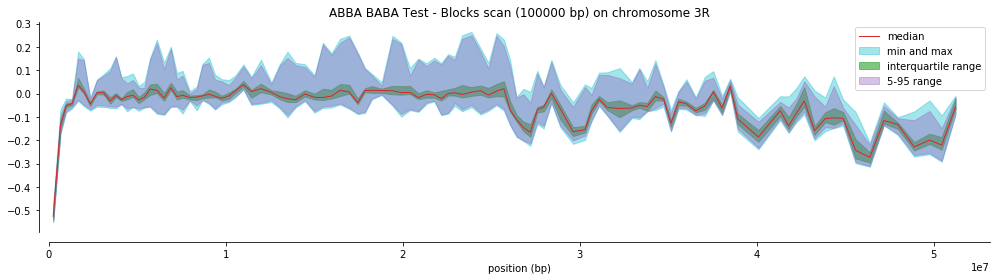

In [14]:
results_3R, bloks_3R, plot_3R = plot_test('3R', A,B,C,D, blen = 100000)

In [15]:
results_3R.head()

,Test,Block_1,Block_2,Block_3,Block_4,Block_5,Block_6,Block_7,Block_8,Block_9,...,Block_98,Block_99,Block_100,Block_101,Block_102,Block_103,Block_104,Block_105,Block_106,Block_107
0,"D-Test(GHgam, AOcol, KE, mela)",-0.530240,-0.100687,-0.078177,-0.057372,-0.027788,-0.045893,-0.073206,-0.056102,-0.045060,...,-0.088907,-0.112803,-0.276760,-0.220207,-0.064720,-0.101459,-0.217426,-0.154199,-0.166843,-0.009463
1,"D-Test(GHgam, BFcol, KE, mela)",-0.545416,-0.141800,-0.056431,-0.045078,0.035444,0.010059,-0.054729,-0.002860,0.011678,...,-0.130182,-0.112262,-0.231231,-0.280769,-0.131531,-0.153019,-0.246464,-0.242430,-0.276108,-0.080576
2,"D-Test(GHgam, GNcol, KE, mela)",-0.533483,-0.120413,-0.040518,-0.029915,0.066679,0.004655,-0.044940,-0.008874,0.009376,...,-0.059365,-0.073999,-0.142640,-0.268607,-0.078888,-0.121190,-0.185685,-0.199142,-0.196413,-0.013158
3,"D-Test(GHgam, CIcol, KE, mela)",-0.505317,-0.152810,-0.059806,-0.045571,0.033276,0.007297,-0.045028,0.000058,0.003443,...,-0.105640,-0.121339,-0.264192,-0.233400,-0.124838,-0.125855,-0.222282,-0.191165,-0.226914,-0.056754
4,"D-Test(GHgam, GHcol, KE, mela)",-0.522251,-0.161261,-0.056473,-0.042240,0.025759,0.011957,-0.058916,-0.000820,0.003957,...,-0.143926,-0.126459,-0.289118,-0.281679,-0.136965,-0.130957,-0.227975,-0.202804,-0.223107,-0.052170


E:\Programmi\Miniconda\envs\pyenv1\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


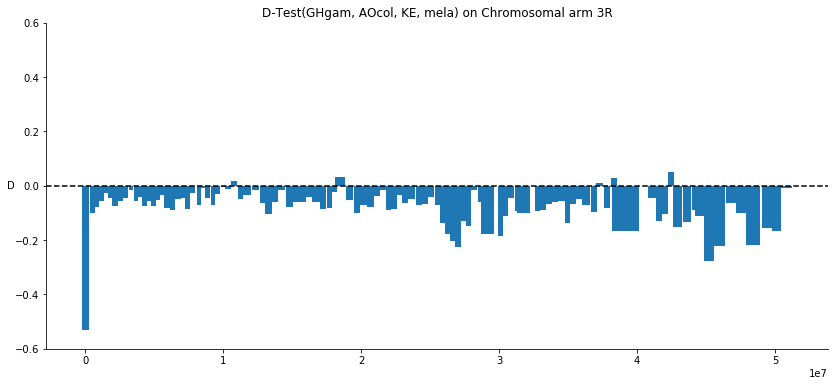

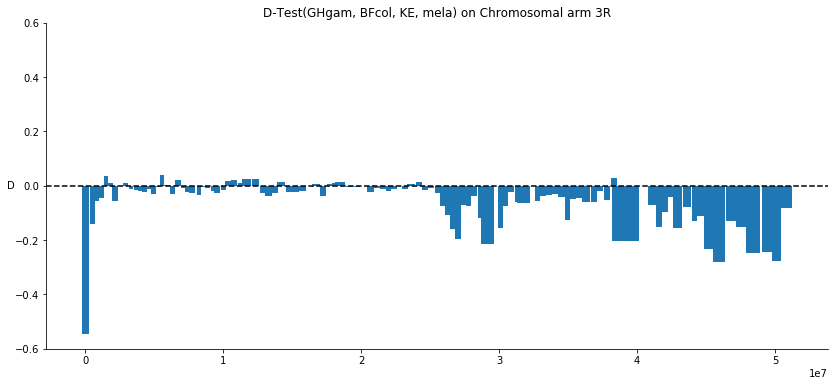

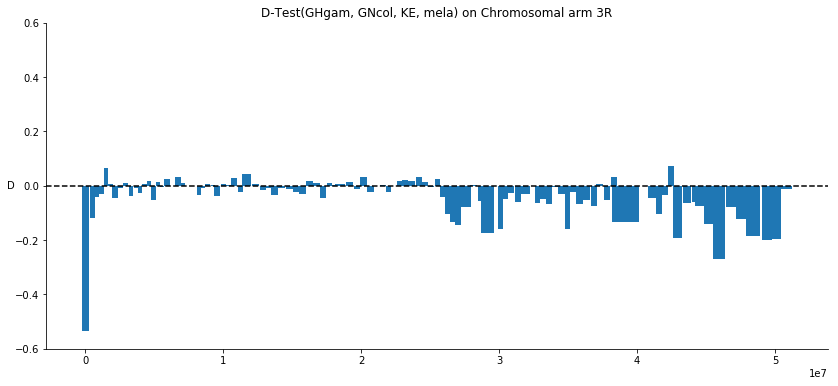

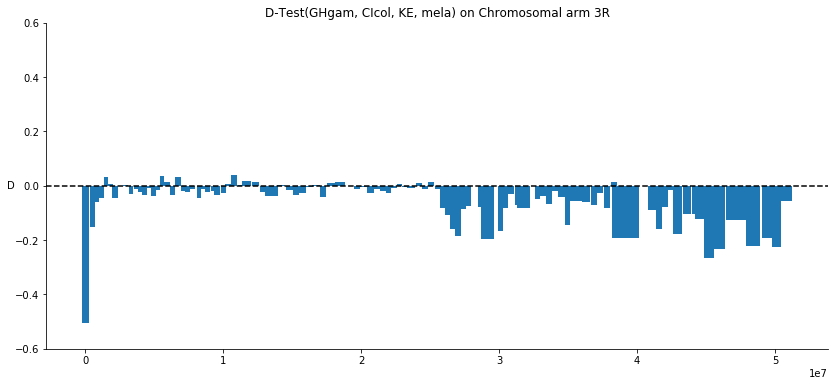

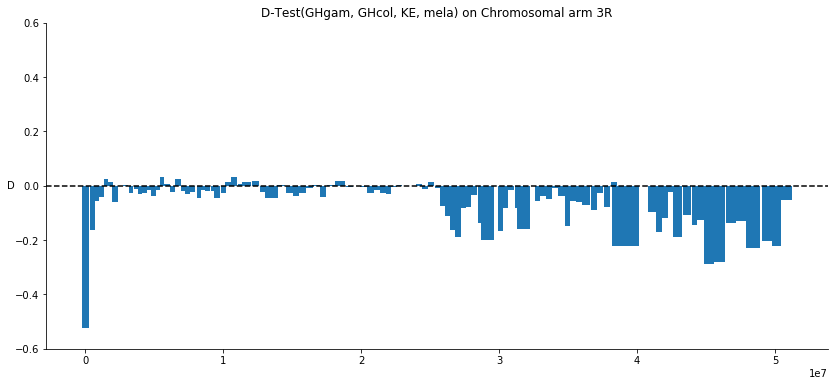

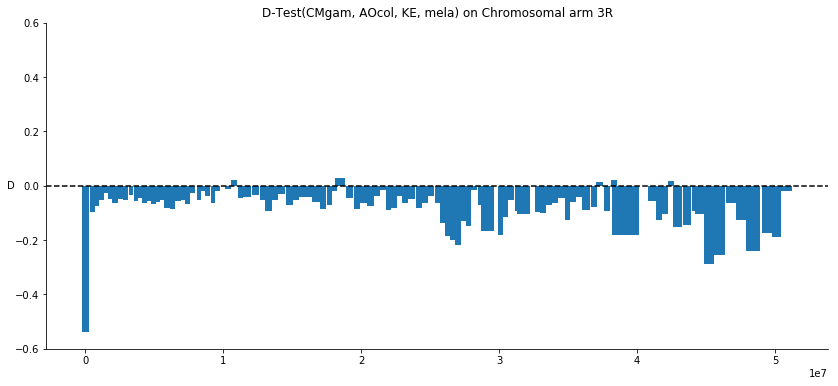

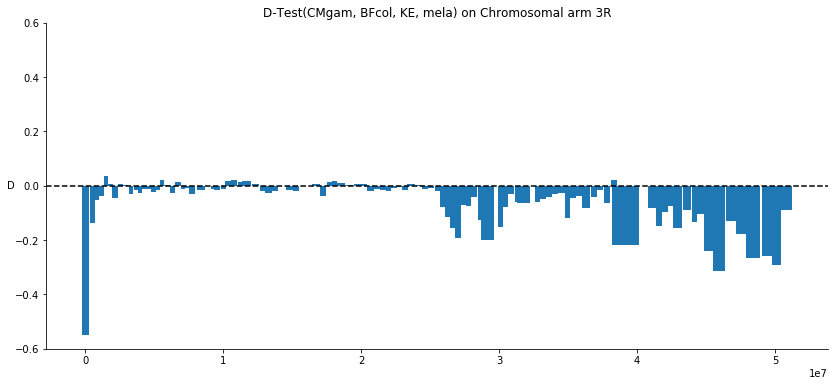

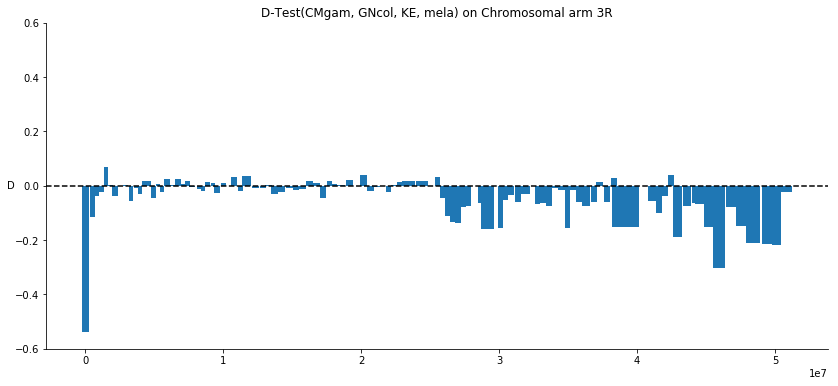

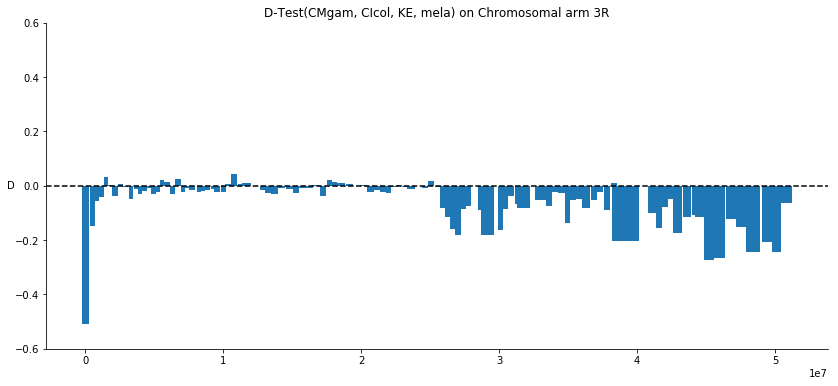

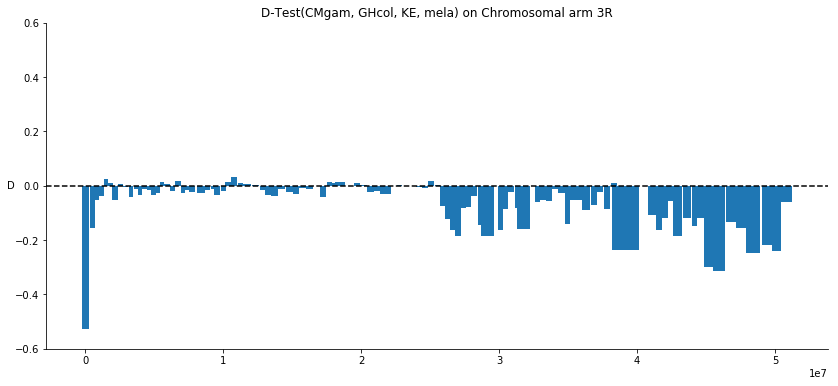

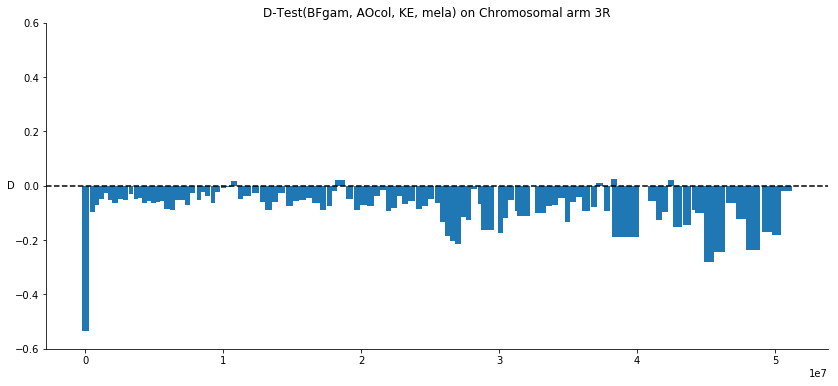

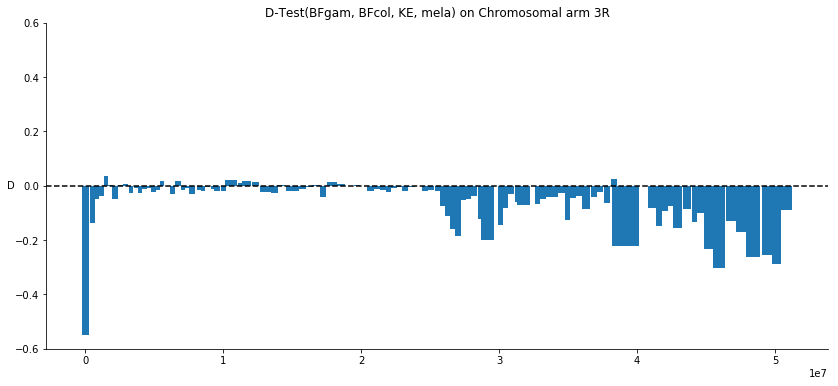

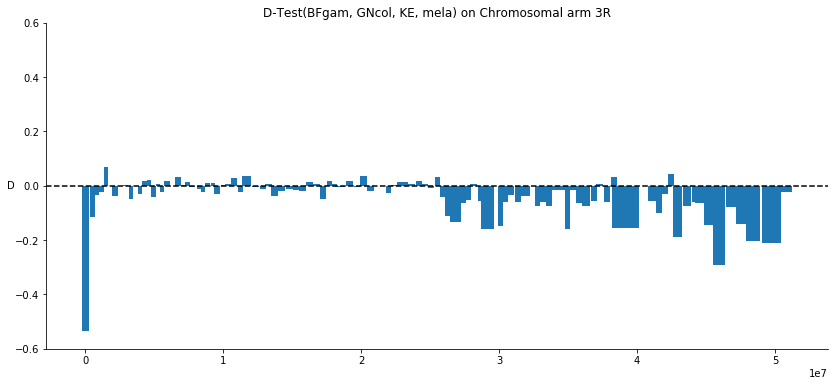

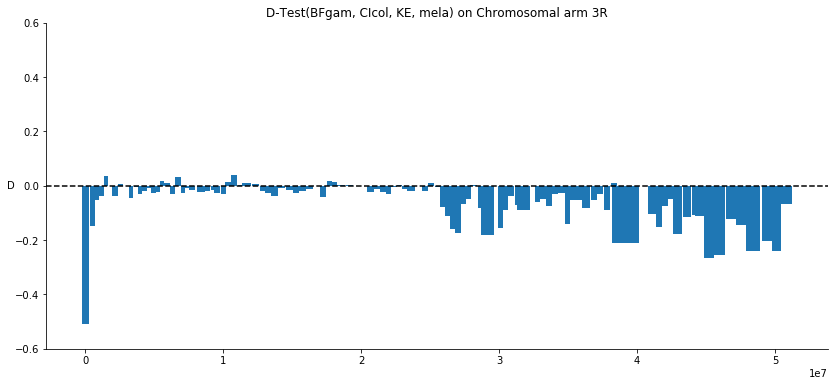

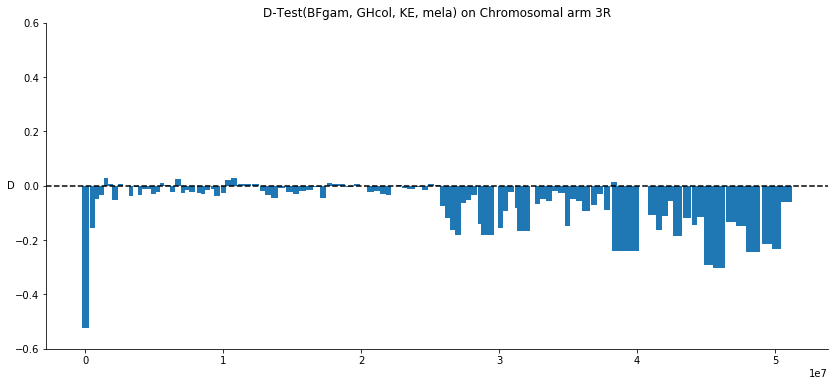

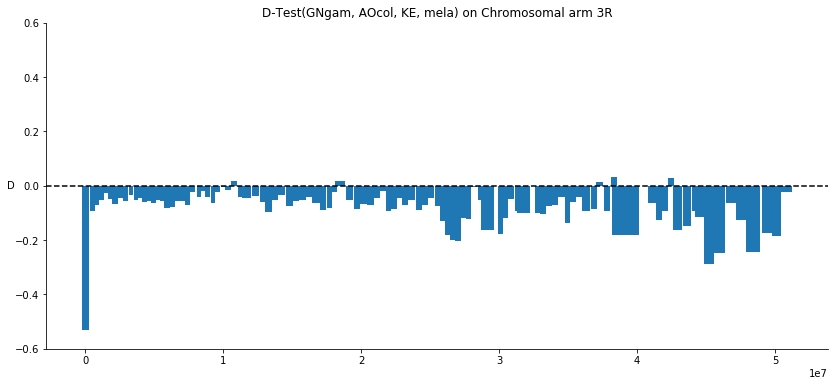

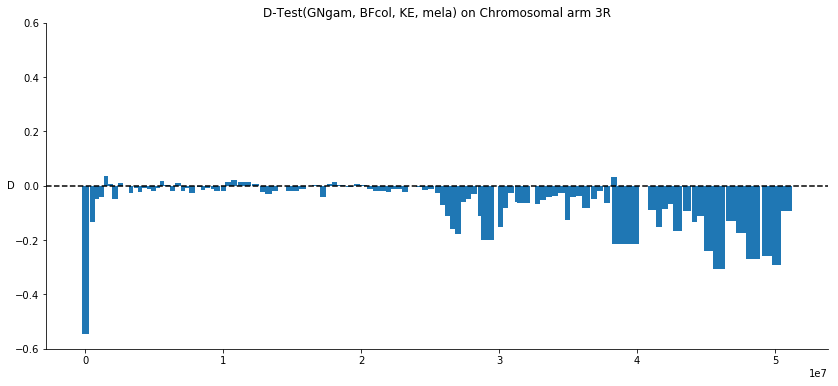

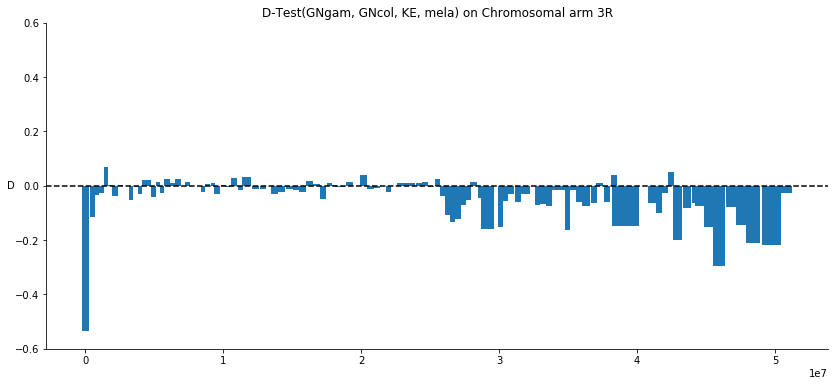

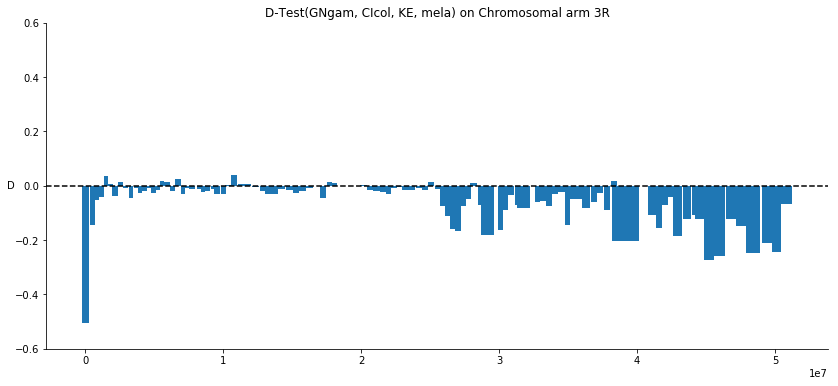

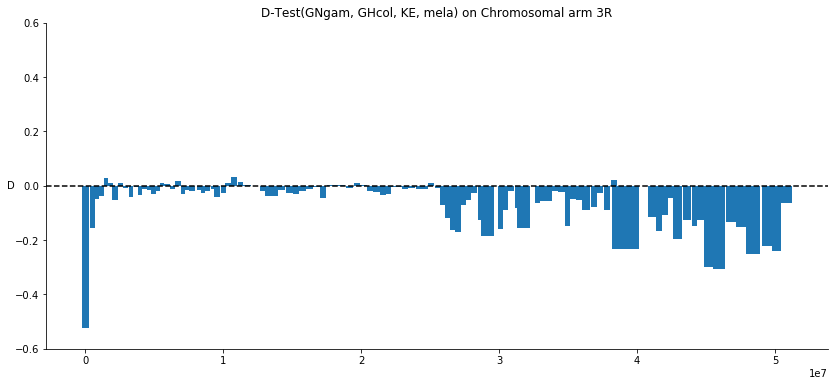

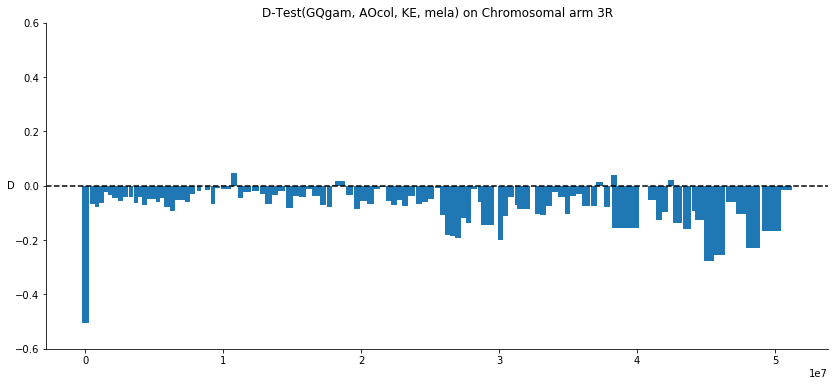

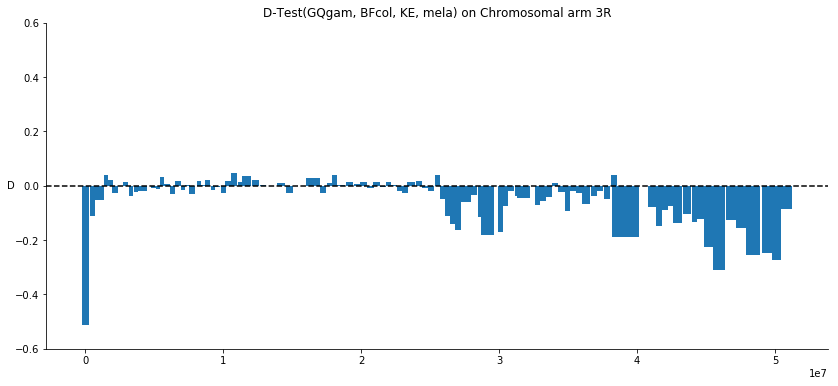

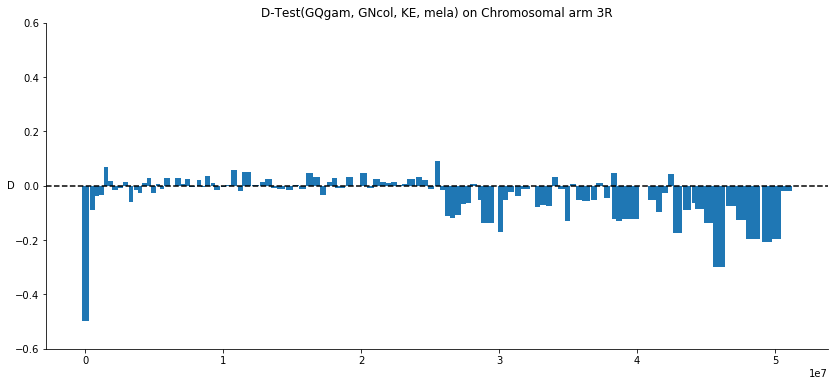

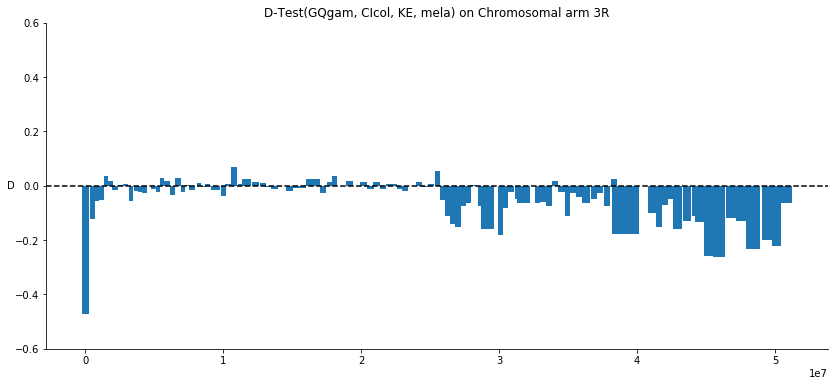

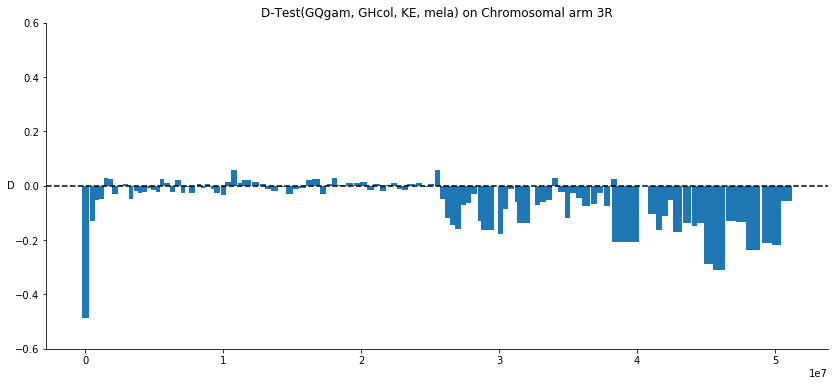

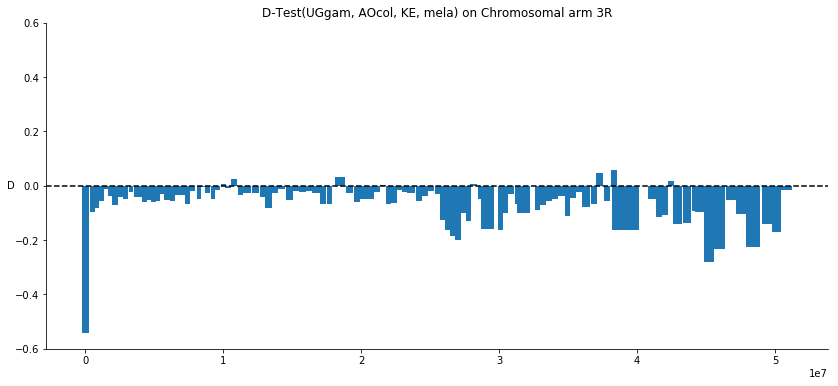

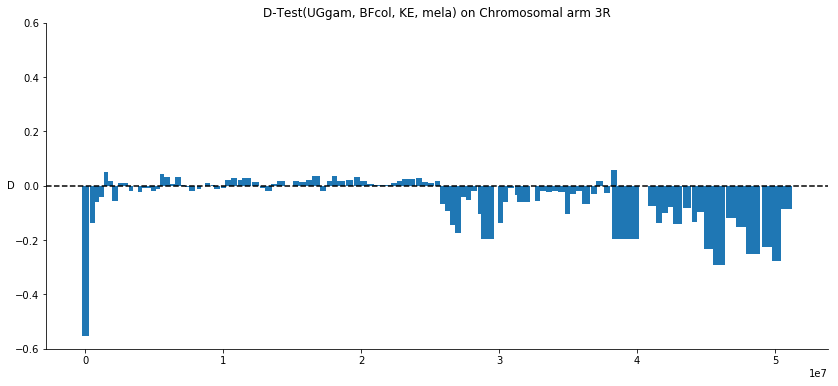

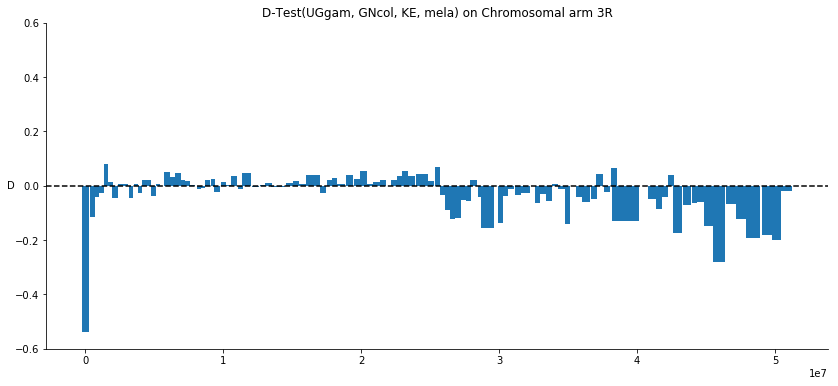

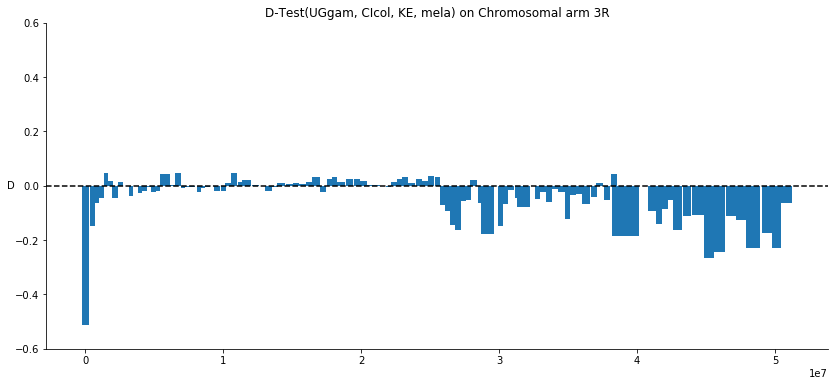

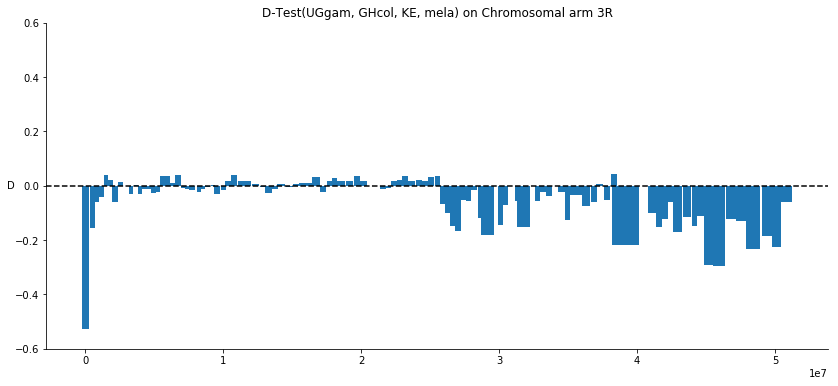

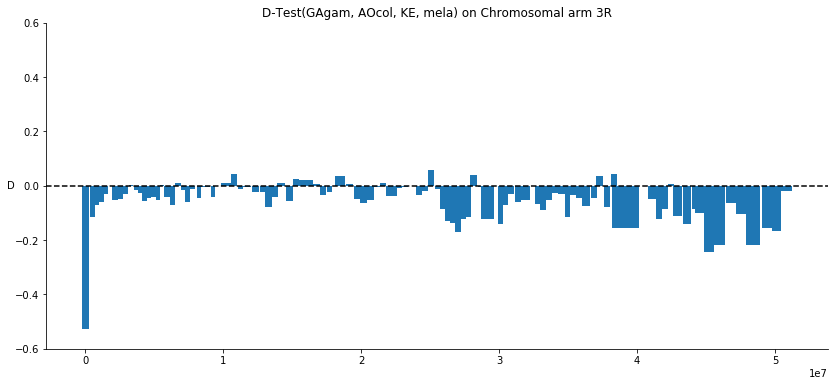

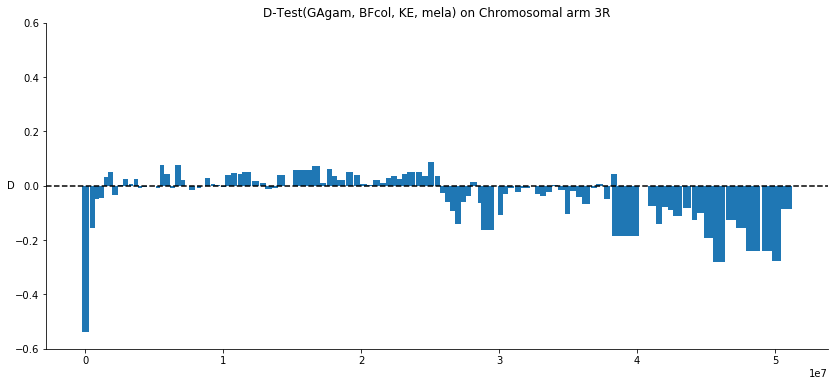

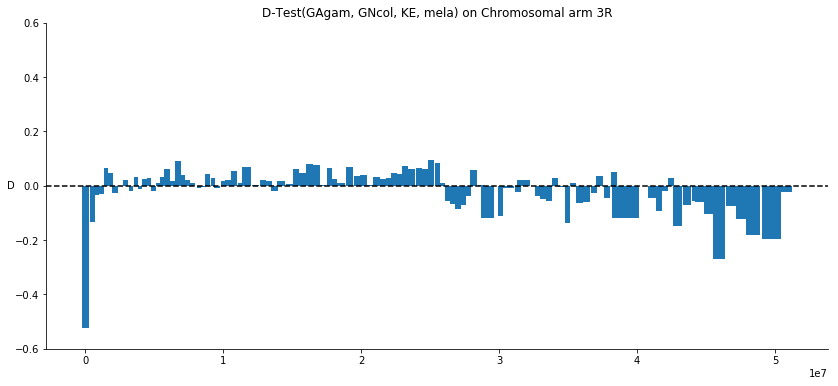

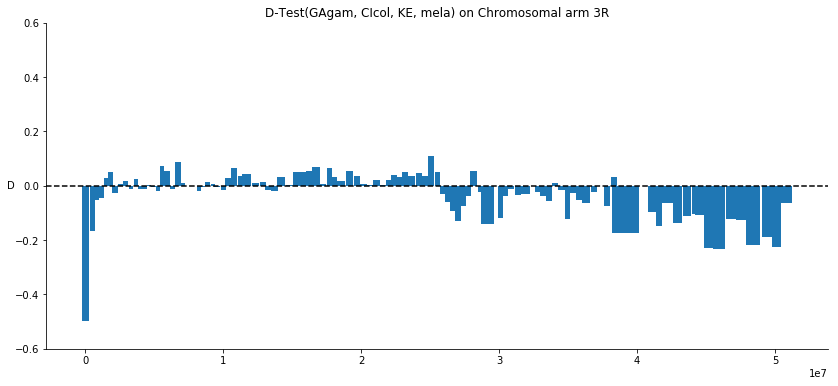

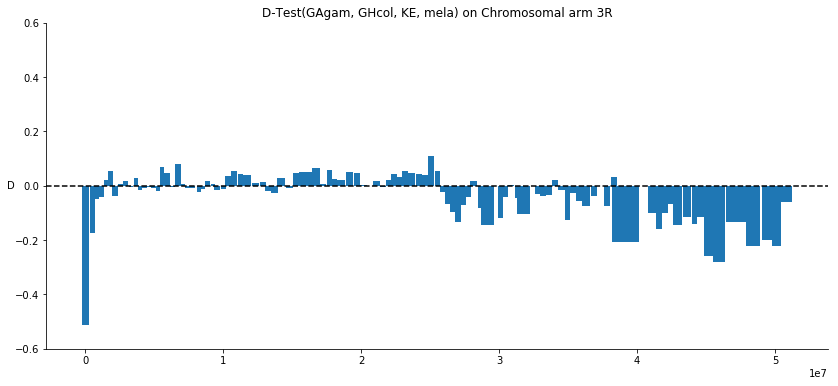

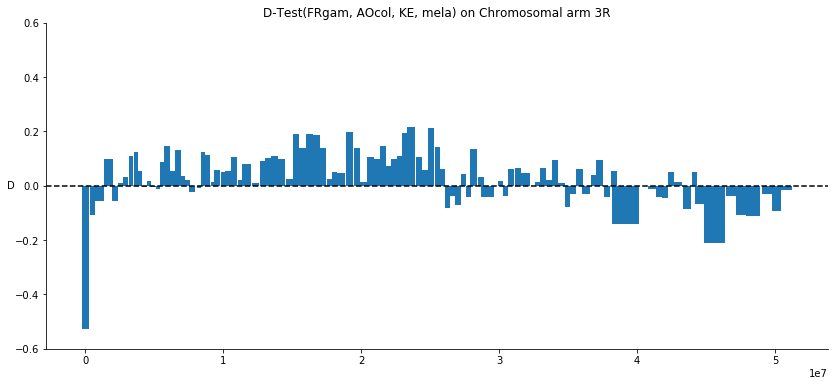

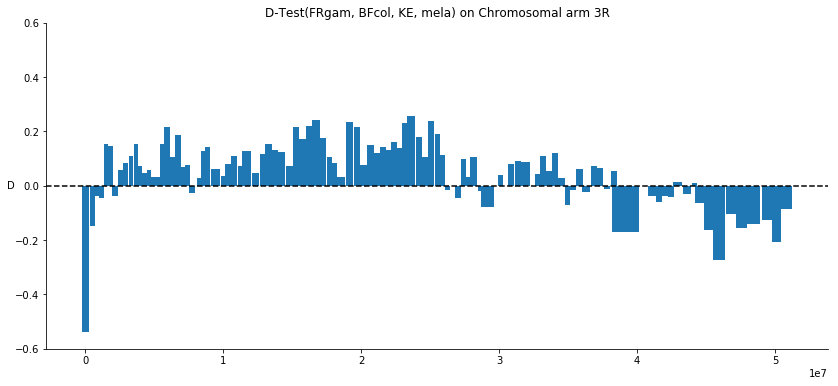

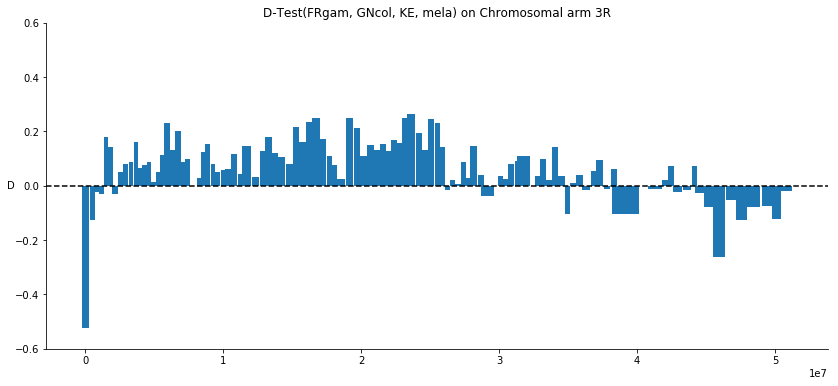

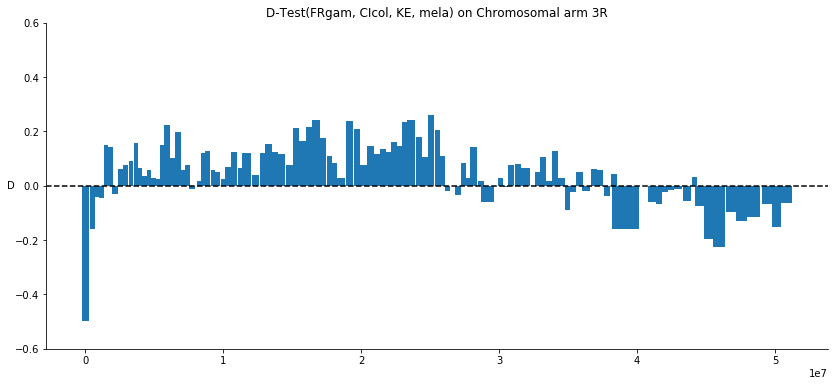

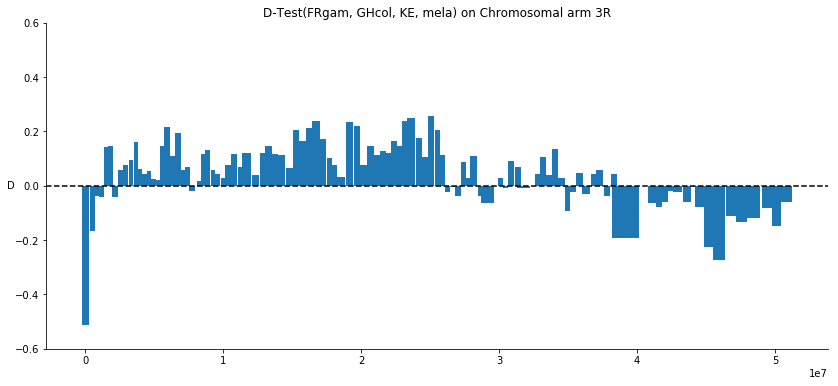

In [16]:
# load variant positions
#title = results_3R['Test']
pos = callset_biallel['3R']['variants']['POS'][:]
block_starts = allel.moving_statistic(pos, statistic=np.min, size=100000)
block_stops = allel.moving_statistic(pos, statistic=np.max, size=100000)
block_widths = block_stops - block_starts
title = results_3R['Test']
### qui bisogna fare un ciclo:
for i in range(len(bloks_3R)):	
		ylim=(-.6, .6)
		fig, ax =  plt.subplots(figsize=(14, 6))
		ax.bar(block_starts, bloks_3R[i], width=block_widths, linewidth=0)
		ax.axhline(0, color='k', linestyle='--')
		ax.set_ylabel('D', rotation=0, ha='center', va='center')
		ax.set_ylim(*ylim)
		ax.set_title('%s on Chromosomal arm 3R' %(title[i]))
		sns.despine()        
i+=1

--------------------------------
## Performing the ABBA-BABA test on chromosomal arm 3L

In [17]:
def plot_test(chroms, As,Bs,Cs,Ds, blen=100000):
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
   
    tbl = []
    tbl2 = [["Block_1","Block_2","Block_3","Block_4","Block_5","Block_6","Block_7","Block_8","Block_9","Block_10","Block_11","Block_12","Block_13","Block_14","Block_15","Block_16","Block_17","Block_18","Block_19","Block_20","Block_21","Block_22","Block_23","Block_24","Block_25","Block_26","Block_27","Block_28","Block_29","Block_30","Block_31","Block_32","Block_33","Block_34","Block_35","Block_36","Block_37","Block_38","Block_39","Block_40","Block_41","Block_42","Block_43","Block_44","Block_45","Block_46","Block_47","Block_48","Block_49","Block_50","Block_51","Block_52","Block_53","Block_54","Block_55","Block_56","Block_57","Block_58","Block_59","Block_60","Block_61","Block_62","Block_63","Block_64","Block_65","Block_66","Block_67","Block_68","Block_69","Block_70","Block_71","Block_72","Block_73","Block_74","Block_75","Block_76","Block_77","Block_78"]]
    tbl3 = [['Test']]

    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, b1, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = "D-Test(%s, %s, %s, %s)" % (A, B, C, D)
                                row = b1
                                tbl += [row]
                                row2 = [test]
                                tbl2 += [row]
                                tbl3 += [row2]
    df1 = etl.todataframe(tbl2)
    df2 = etl.todataframe(tbl3)
    results = df2.join(df1)
    tbl=np.array(tbl)
    #print (tbl)
    fig, ax = plt.subplots(figsize=(14, 4))
    # mean
    pos = callset_biallel[chrom]['variants']['POS'][:]
    windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=blen)
    x = np.asarray(windows).mean(axis=1)    
    y = np.median(tbl, axis=0)
    plt.plot(x, y, lw=1, label = "median", color=palette[3]) 
    
    #min and max
    y5 = np.max(tbl, axis=0)
    y6 = np.min(tbl, axis=0)
    ax.fill_between(x, y5, y6,label = "min and max", color=palette[9], alpha=.4)
    
    # interquartile range
    y1 = np.percentile(tbl, 25, axis=0)
    y2 = np.percentile(tbl, 75, axis=0)
    ax.fill_between(x, y1, y2, label = "interquartile range", color=palette[2], alpha=.6)
    # 5-95 range
    y3 = np.percentile(tbl, 5, axis=0)
    y4 = np.percentile(tbl, 95, axis=0)
    ax.fill_between(x, y3, y4,label = "5-95 range", color=palette[4], alpha=.4)

    
    ax.set_title(('ABBA BABA Test - Blocks scan (%s bp) on chromosome %s') % (blen, chrom))
    sns.despine(ax=ax, offset=10)
    ax.set_xlim(0, pos.max())
    ax.set_xlabel('position (bp)')
    #ax.set_ylim(0,0.018)
    sns.despine(ax=ax, offset=10)
    fig.tight_layout()
    # show a legend on the plot 
    plt.legend() 

    # function to show the plot 
    plt.show()
    
    return results, tbl, plt

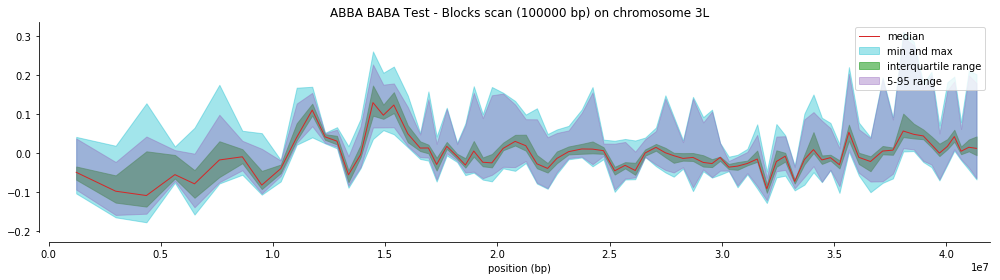

In [18]:
results_3L, blocks_3L, plot_3L = plot_test('3L', A,B,C,D, blen = 100000)

In [19]:
results_3L.head()

,Test,Block_1,Block_2,Block_3,Block_4,Block_5,Block_6,Block_7,Block_8,Block_9,...,Block_69,Block_70,Block_71,Block_72,Block_73,Block_74,Block_75,Block_76,Block_77,Block_78
0,"D-Test(GHgam, AOcol, KE, mela)",0.041992,-0.036294,0.022632,-0.012319,-0.009010,0.061739,0.001680,-0.044789,-0.035761,...,0.014909,0.005672,-0.014700,-0.035600,-0.062518,-0.021468,0.006628,0.000792,-0.028604,-0.063772
1,"D-Test(GHgam, BFcol, KE, mela)",-0.030181,-0.081048,-0.147590,-0.069034,-0.107211,-0.022094,-0.055065,-0.084923,-0.033549,...,0.037326,0.030211,0.040607,0.008801,0.001271,0.020870,0.025519,0.021051,0.015852,-0.009837
2,"D-Test(GHgam, GNcol, KE, mela)",-0.056453,-0.086647,-0.002943,-0.004446,-0.069782,0.073942,-0.019690,-0.102758,-0.041861,...,0.069557,0.049591,0.057088,0.018008,0.022770,0.041953,0.039306,-0.002350,0.030552,0.027936
3,"D-Test(GHgam, CIcol, KE, mela)",-0.039535,-0.100671,-0.122957,-0.064951,-0.075975,-0.021872,-0.032514,-0.082385,-0.054644,...,0.052432,0.042647,0.043255,0.012458,-0.003364,0.017865,0.026781,0.003856,0.012992,0.006250
4,"D-Test(GHgam, GHcol, KE, mela)",-0.083849,-0.120062,-0.144536,-0.073912,-0.114780,-0.012384,-0.040651,-0.102463,-0.057604,...,0.056058,0.038261,0.043555,0.014805,-0.002001,0.014660,0.029504,-0.000478,0.015532,-0.001304


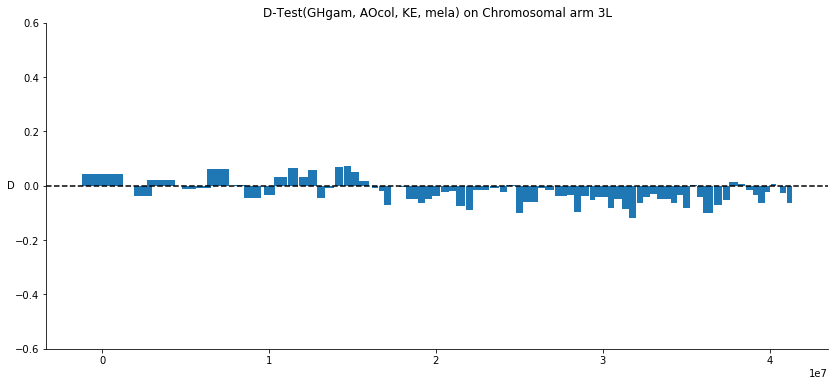

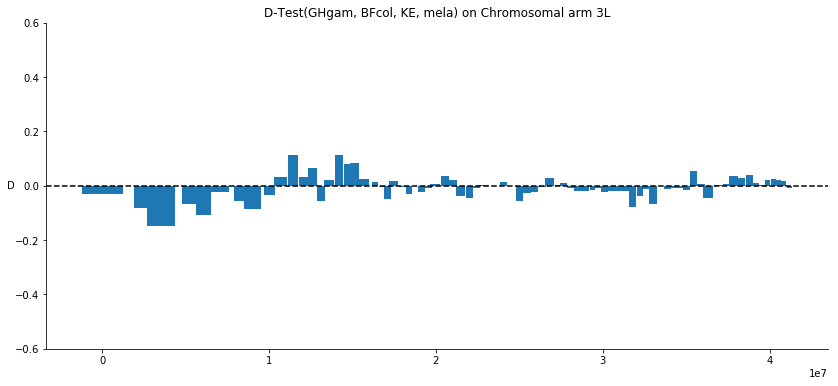

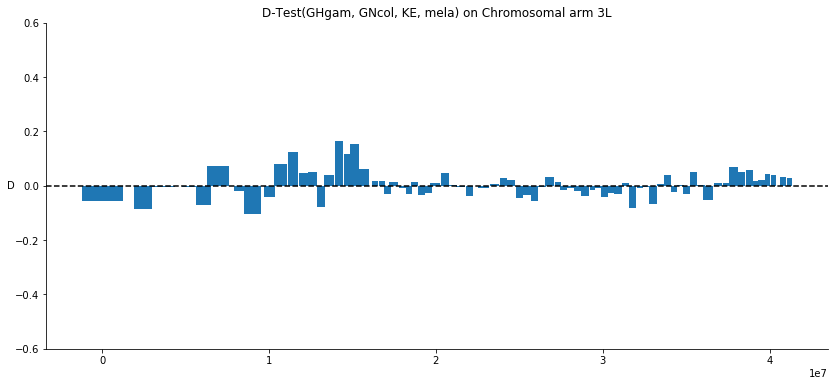

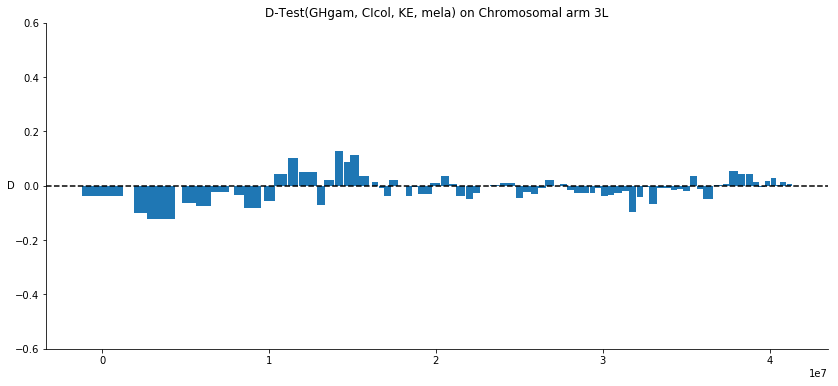

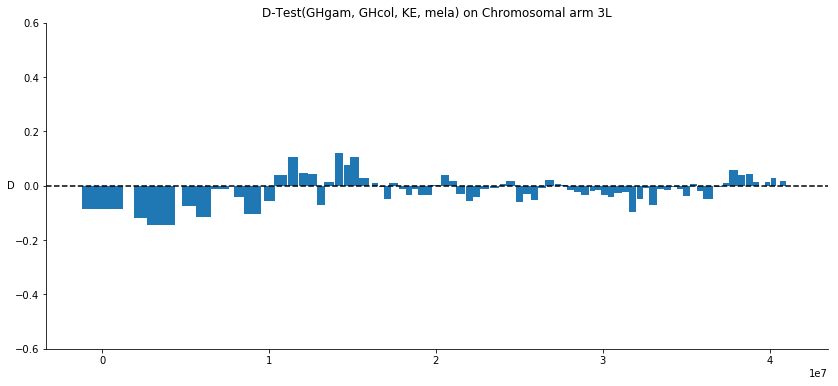

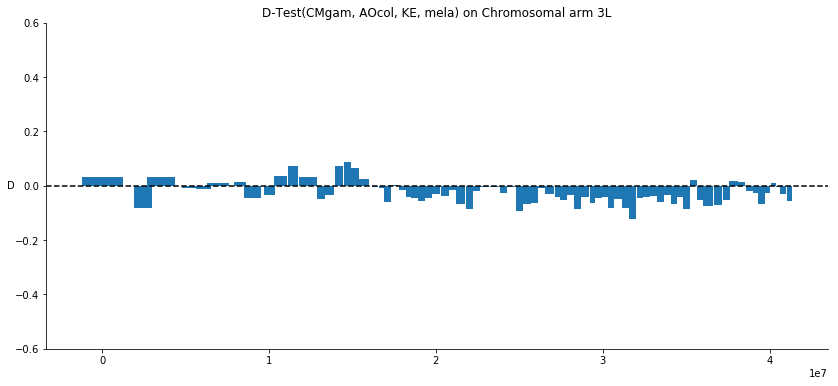

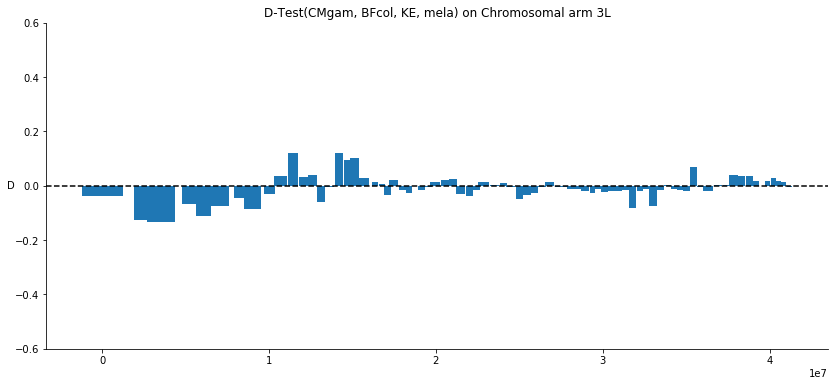

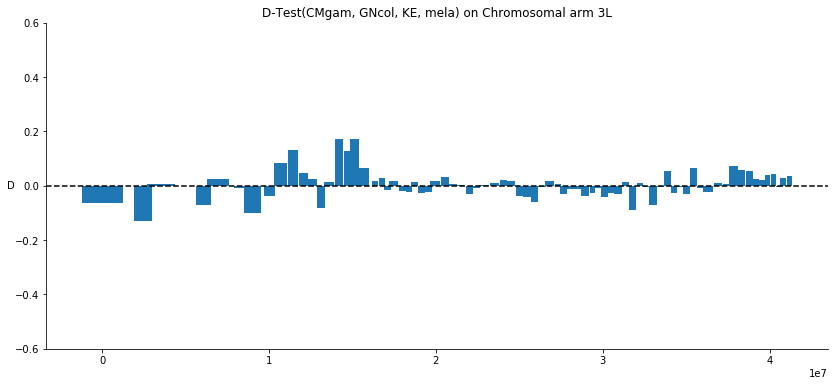

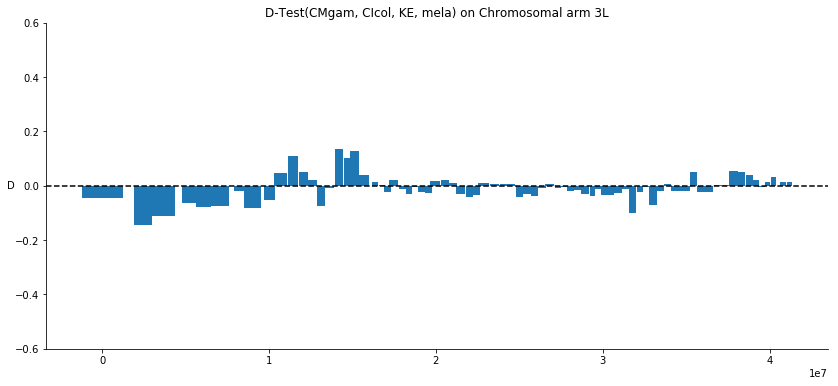

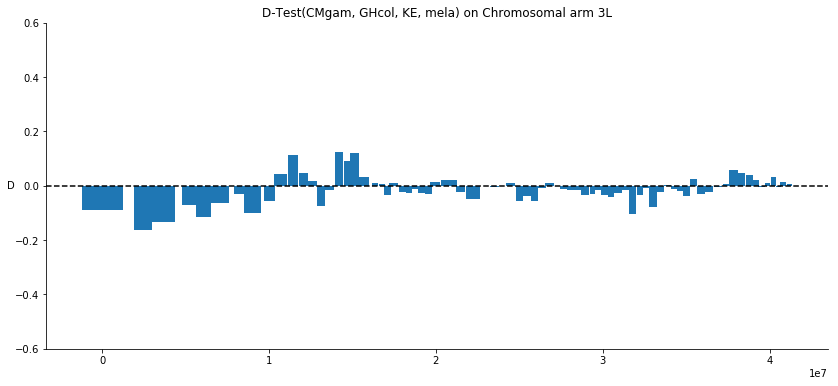

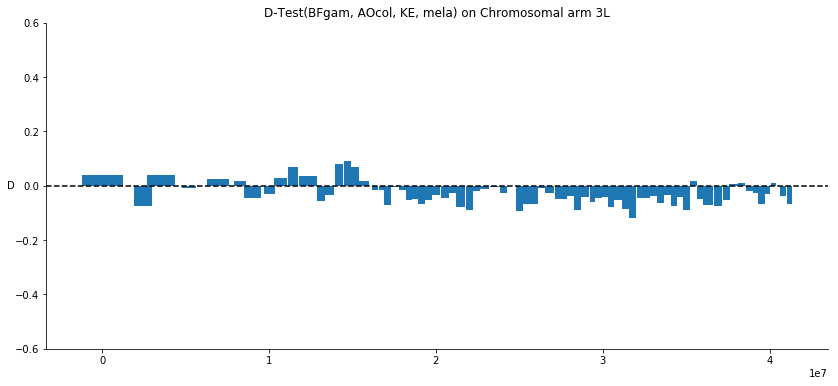

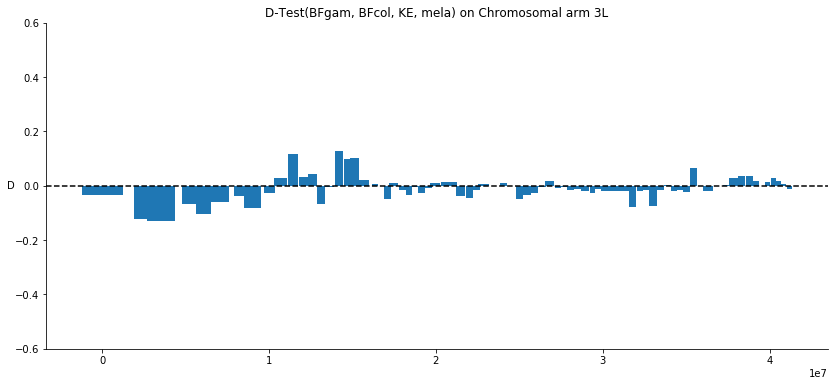

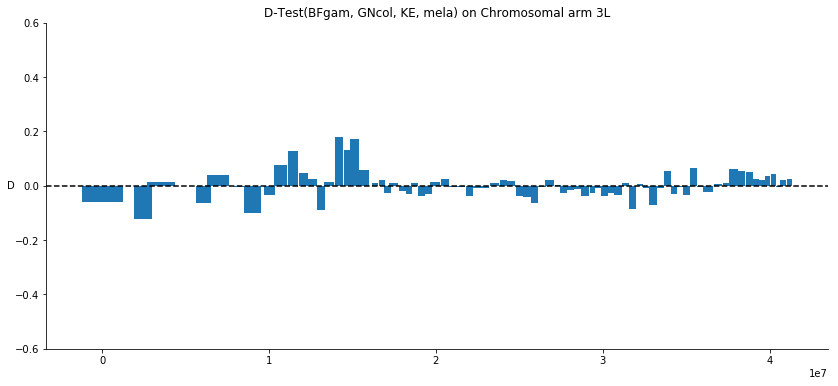

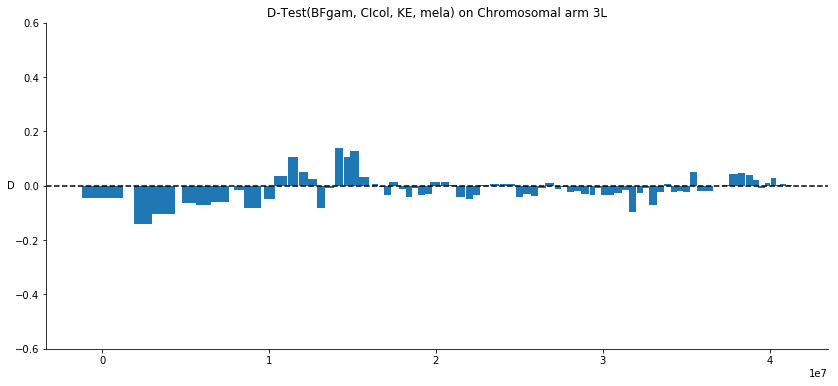

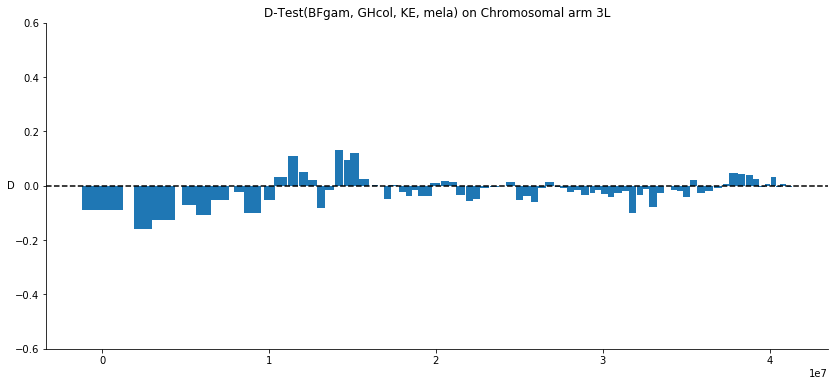

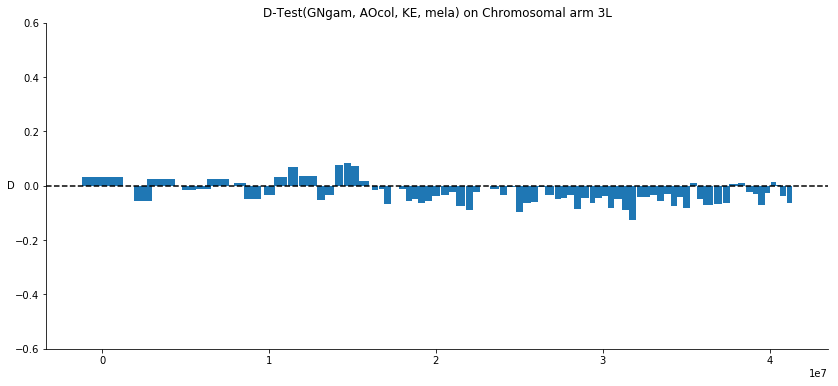

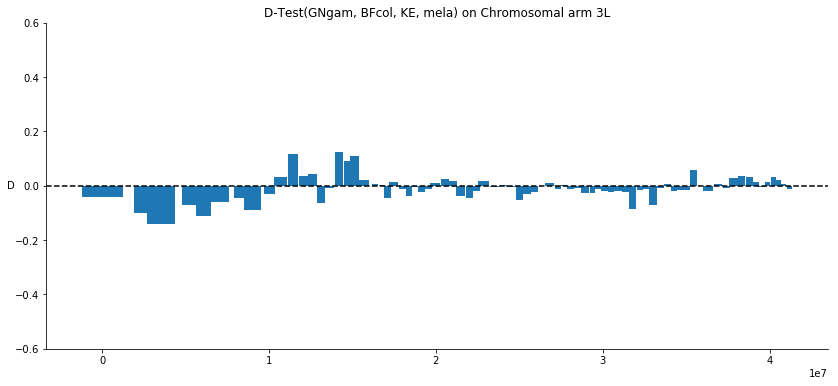

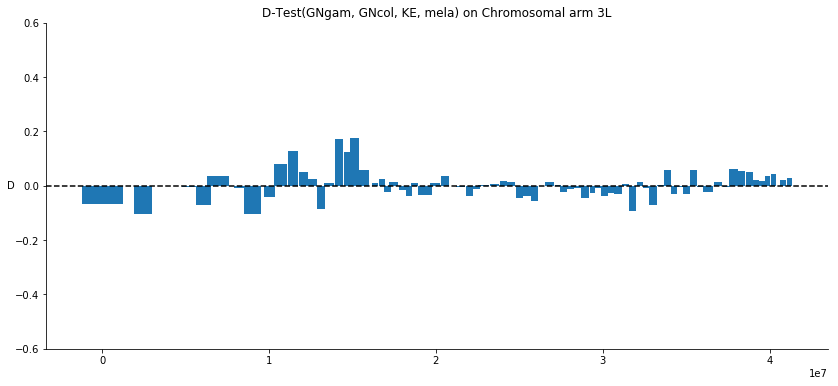

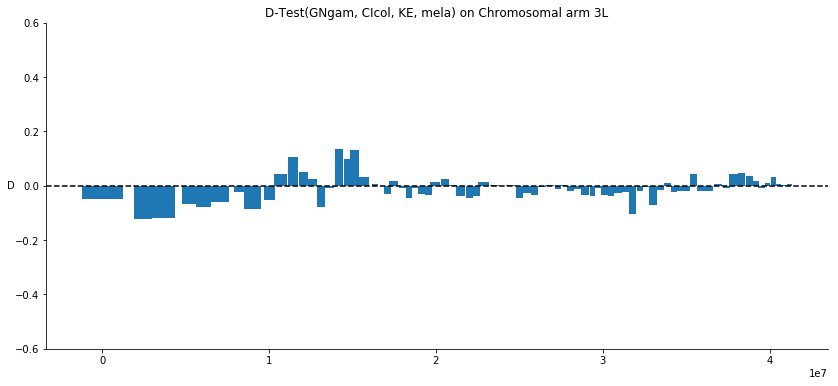

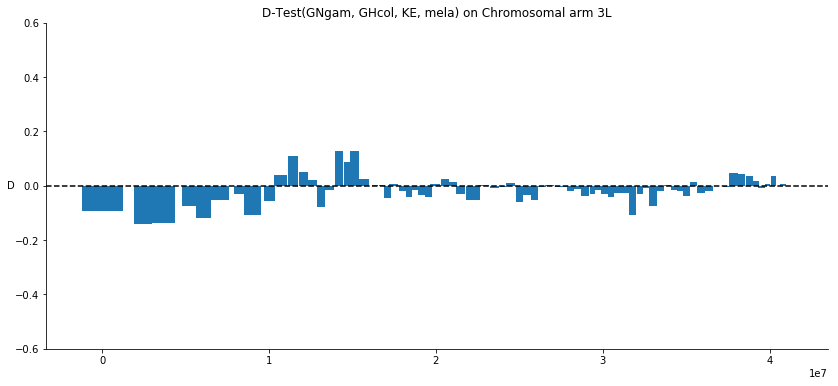

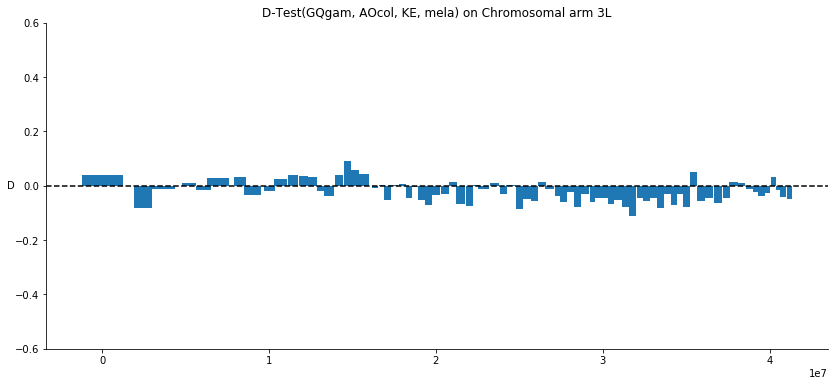

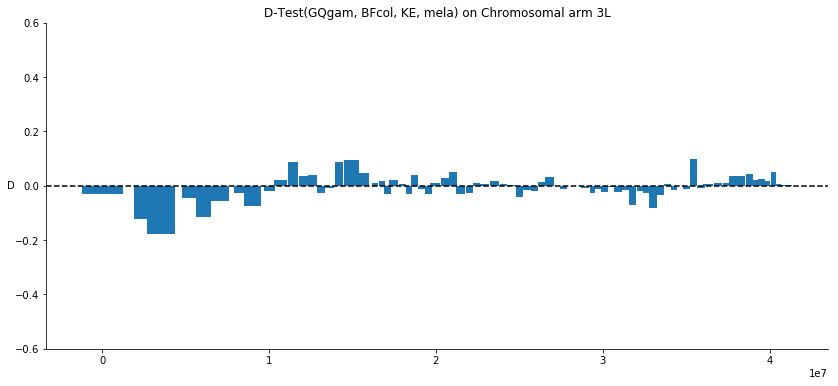

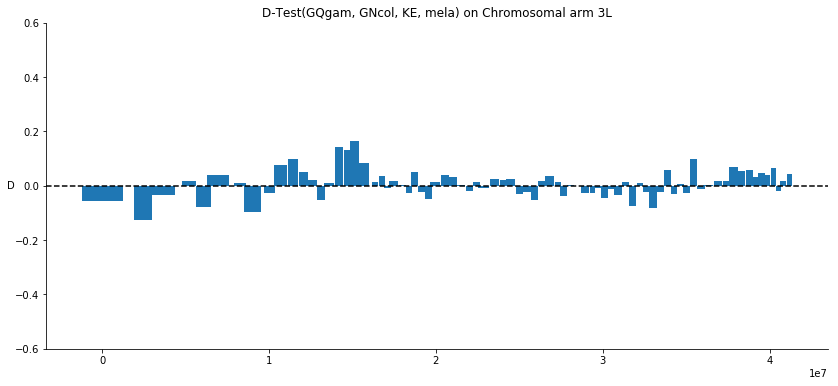

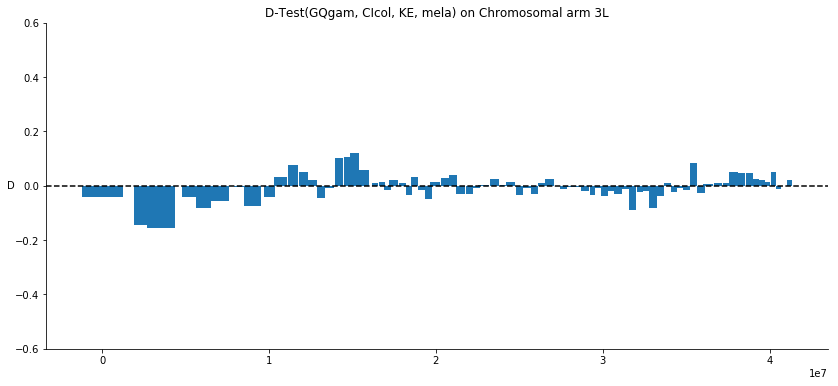

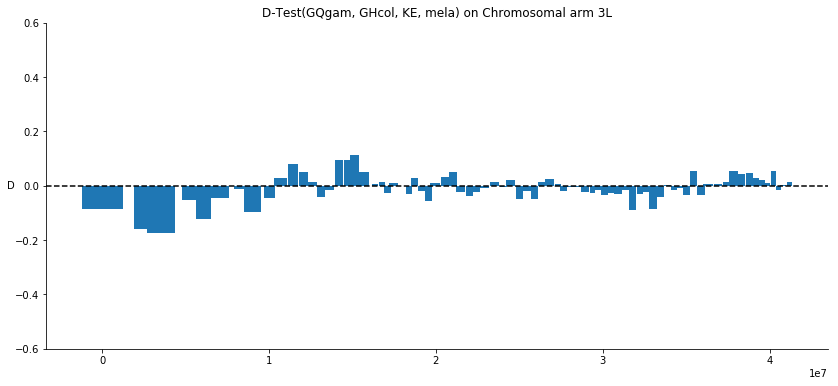

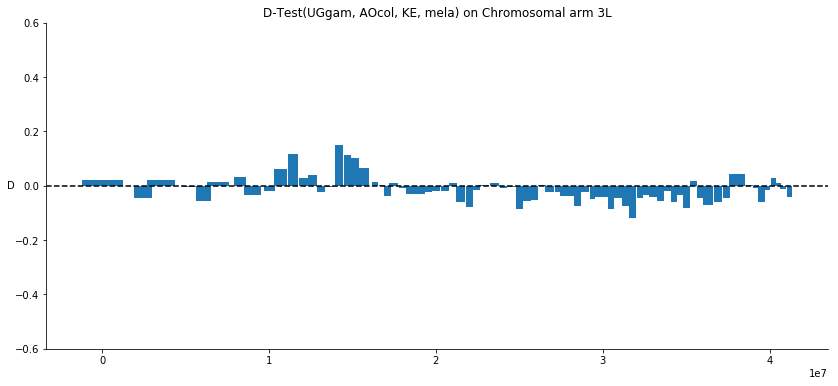

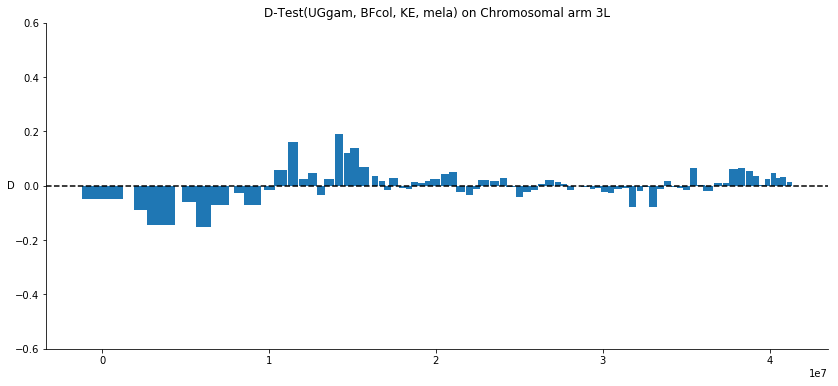

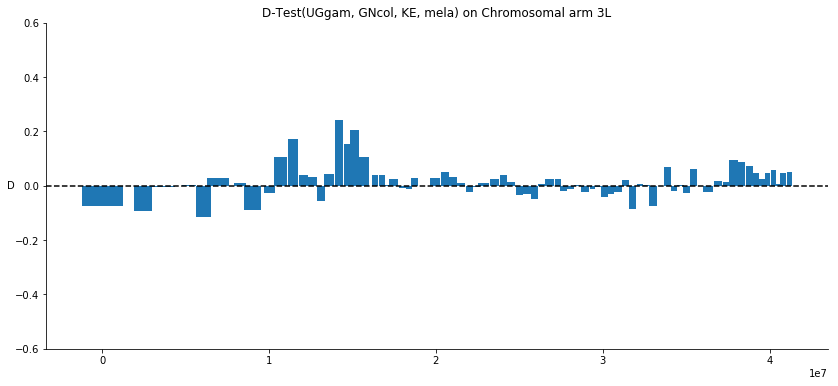

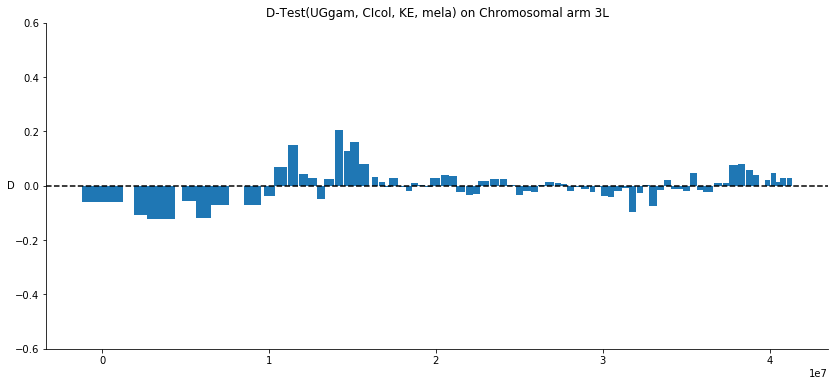

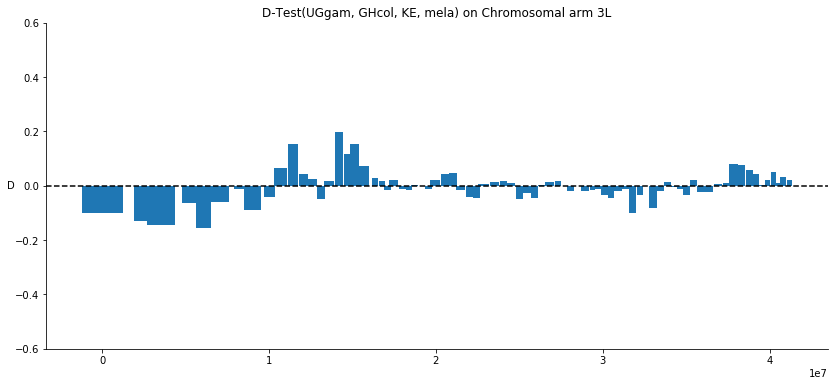

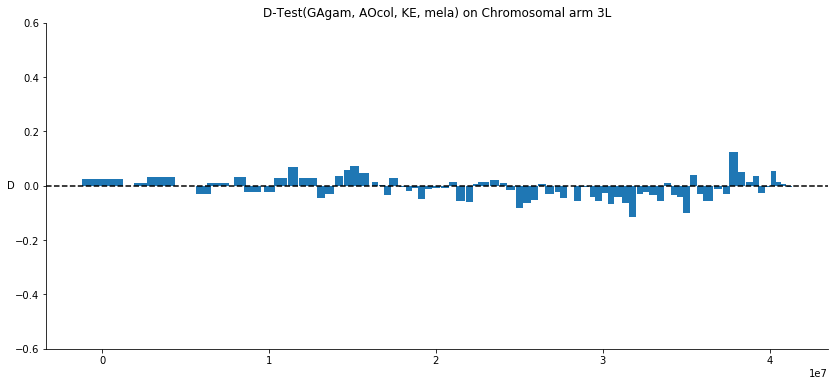

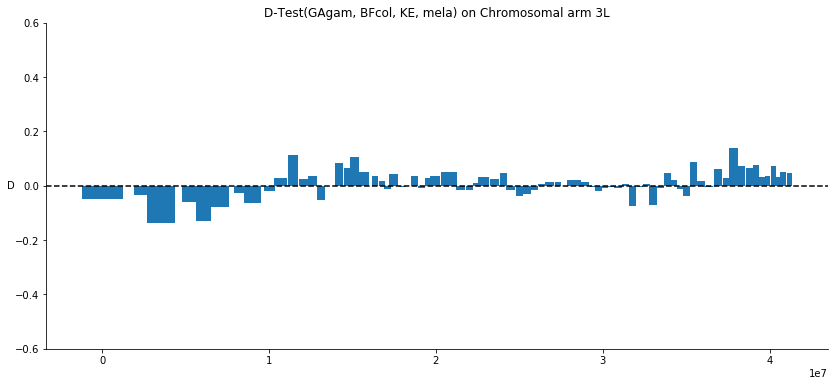

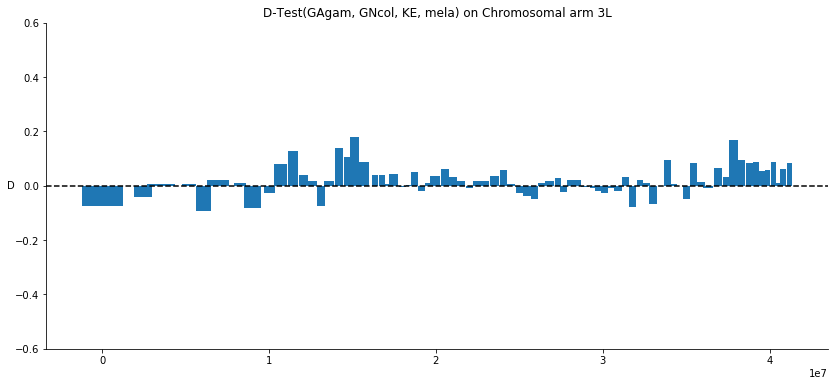

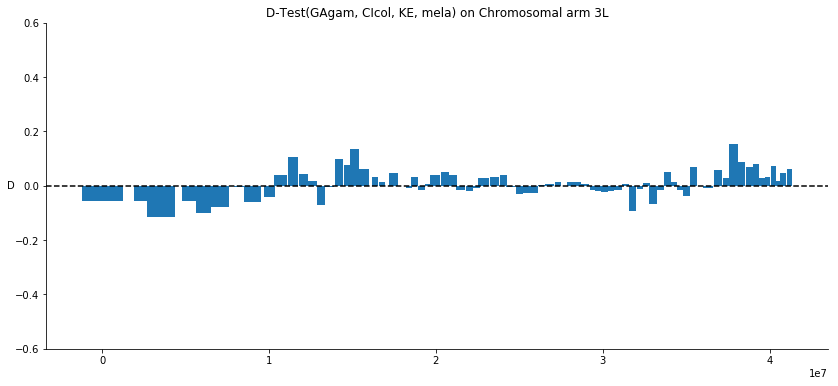

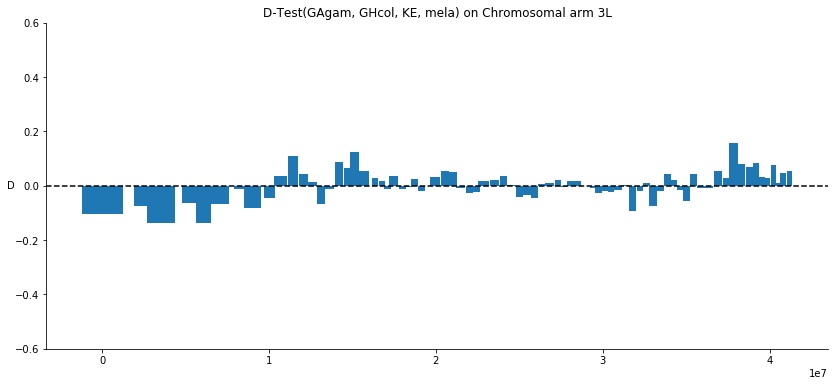

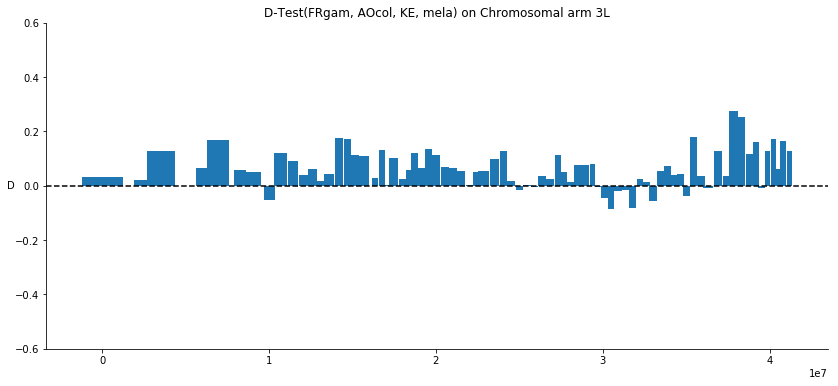

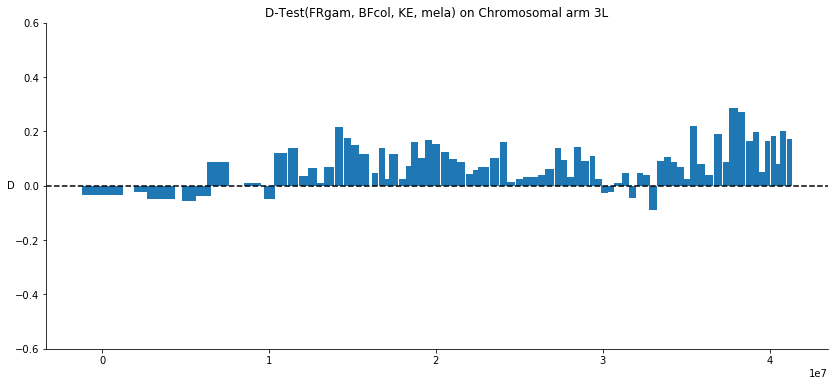

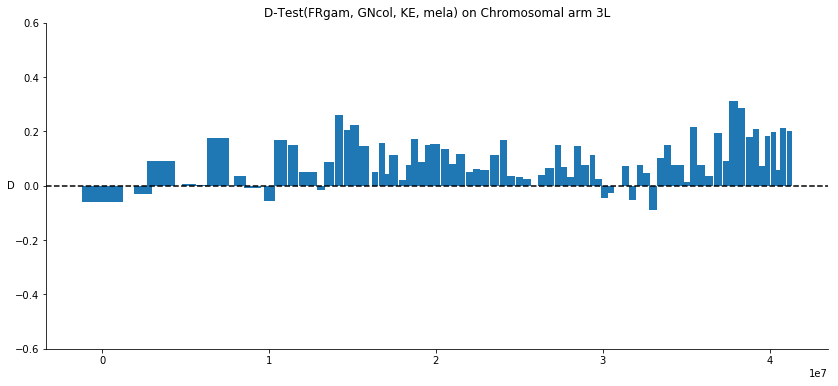

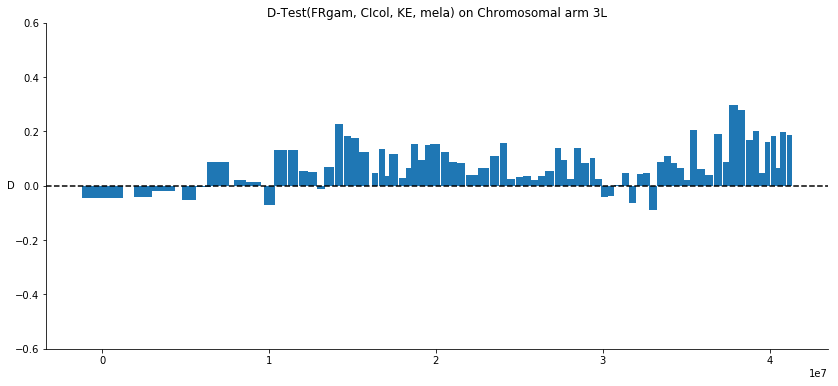

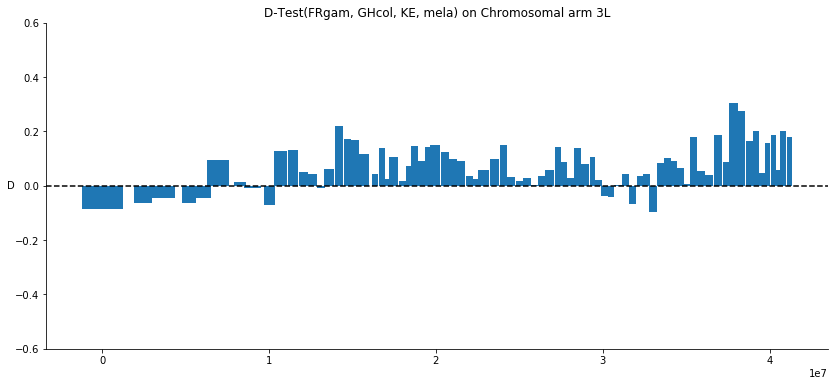

In [20]:
# load variant positions
pos = callset_biallel['3L']['variants']['POS'][:]
block_starts = allel.moving_statistic(pos, statistic=np.min, size=100000)
block_stops = allel.moving_statistic(pos, statistic=np.max, size=100000)
block_widths = block_stops - block_starts
title = results_3L['Test']
### qui bisogna fare un ciclo:
for i in range(len(bloks_3R)):	
		ylim=(-.6, .6)
		fig, ax =  plt.subplots(figsize=(14, 6))
		ax.bar(block_starts, blocks_3L[i], width=block_widths, linewidth=0)
		ax.axhline(0, color='k', linestyle='--')
		ax.set_ylabel('D', rotation=0, ha='center', va='center')
		ax.set_ylim(*ylim)
		ax.set_title('%s on Chromosomal arm 3L' %(title[i]))
		sns.despine()        
i+=1

-------------------------